In [1]:
import meep as mp
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import Video
from meep.materials import Si
from meep.materials import SiO2
from meep.materials import Ag
%matplotlib notebook

In [2]:
resolution = 20   # pixels/um

r = 0.1
w = 1.2           # width of waveguide
d = 1.4           # defect spacing (ordinary spacing = 1)
N = 2

sx = 8            # size of cell in x direction
sy = 8            # size of cell in y direction (perpendicular to wvg.)
pad = 2           # padding between last hole and PML edge
dpml = 1          # PML thickness

In [3]:
cell = mp.Vector3(sx,sy,0)

geometry = [mp.Block(center=mp.Vector3(0,2,0), size=mp.Vector3(w,2,0), material=SiO2),
            mp.Block(center=mp.Vector3(0,0,0), size=mp.Vector3(w,2,0), material=Si),
            mp.Block(center=mp.Vector3(0,-2,0), size=mp.Vector3(w,2,0), material=SiO2)]

for i in range(N):
        geometry.append(mp.Cylinder(material=Si, 
                                    center=mp.Vector3(-0.6+((i+1)*w)/(N+1),2.5,0),
                                    radius = r))
        
pml_layers = [mp.PML(1.0)]

In [4]:
fcen = 0.25   # pulse center frequency
df = 0.2       # pulse frequency width

src = [mp.Source(mp.GaussianSource(fcen, fwidth=df),
                 component=mp.Ex,
                 center=mp.Vector3(0,0.5*sy-dpml,0),
                 size=mp.Vector3(w,0,0))]

In [5]:
sim = mp.Simulation(cell_size=cell,
                    geometry=geometry,
                    boundary_layers=pml_layers,
                    sources=src,
                    resolution=resolution)

In [6]:
freg = mp.FluxRegion(center=mp.Vector3(0,-0.5*sy+dpml+0.5,0),
                     size=mp.Vector3(2*w,0,0))

nfreq = 500 # number of frequencies at which to compute flux

# transmitted flux
trans = sim.add_flux(fcen, df, nfreq, freg)

<IPython.core.display.Javascript object>


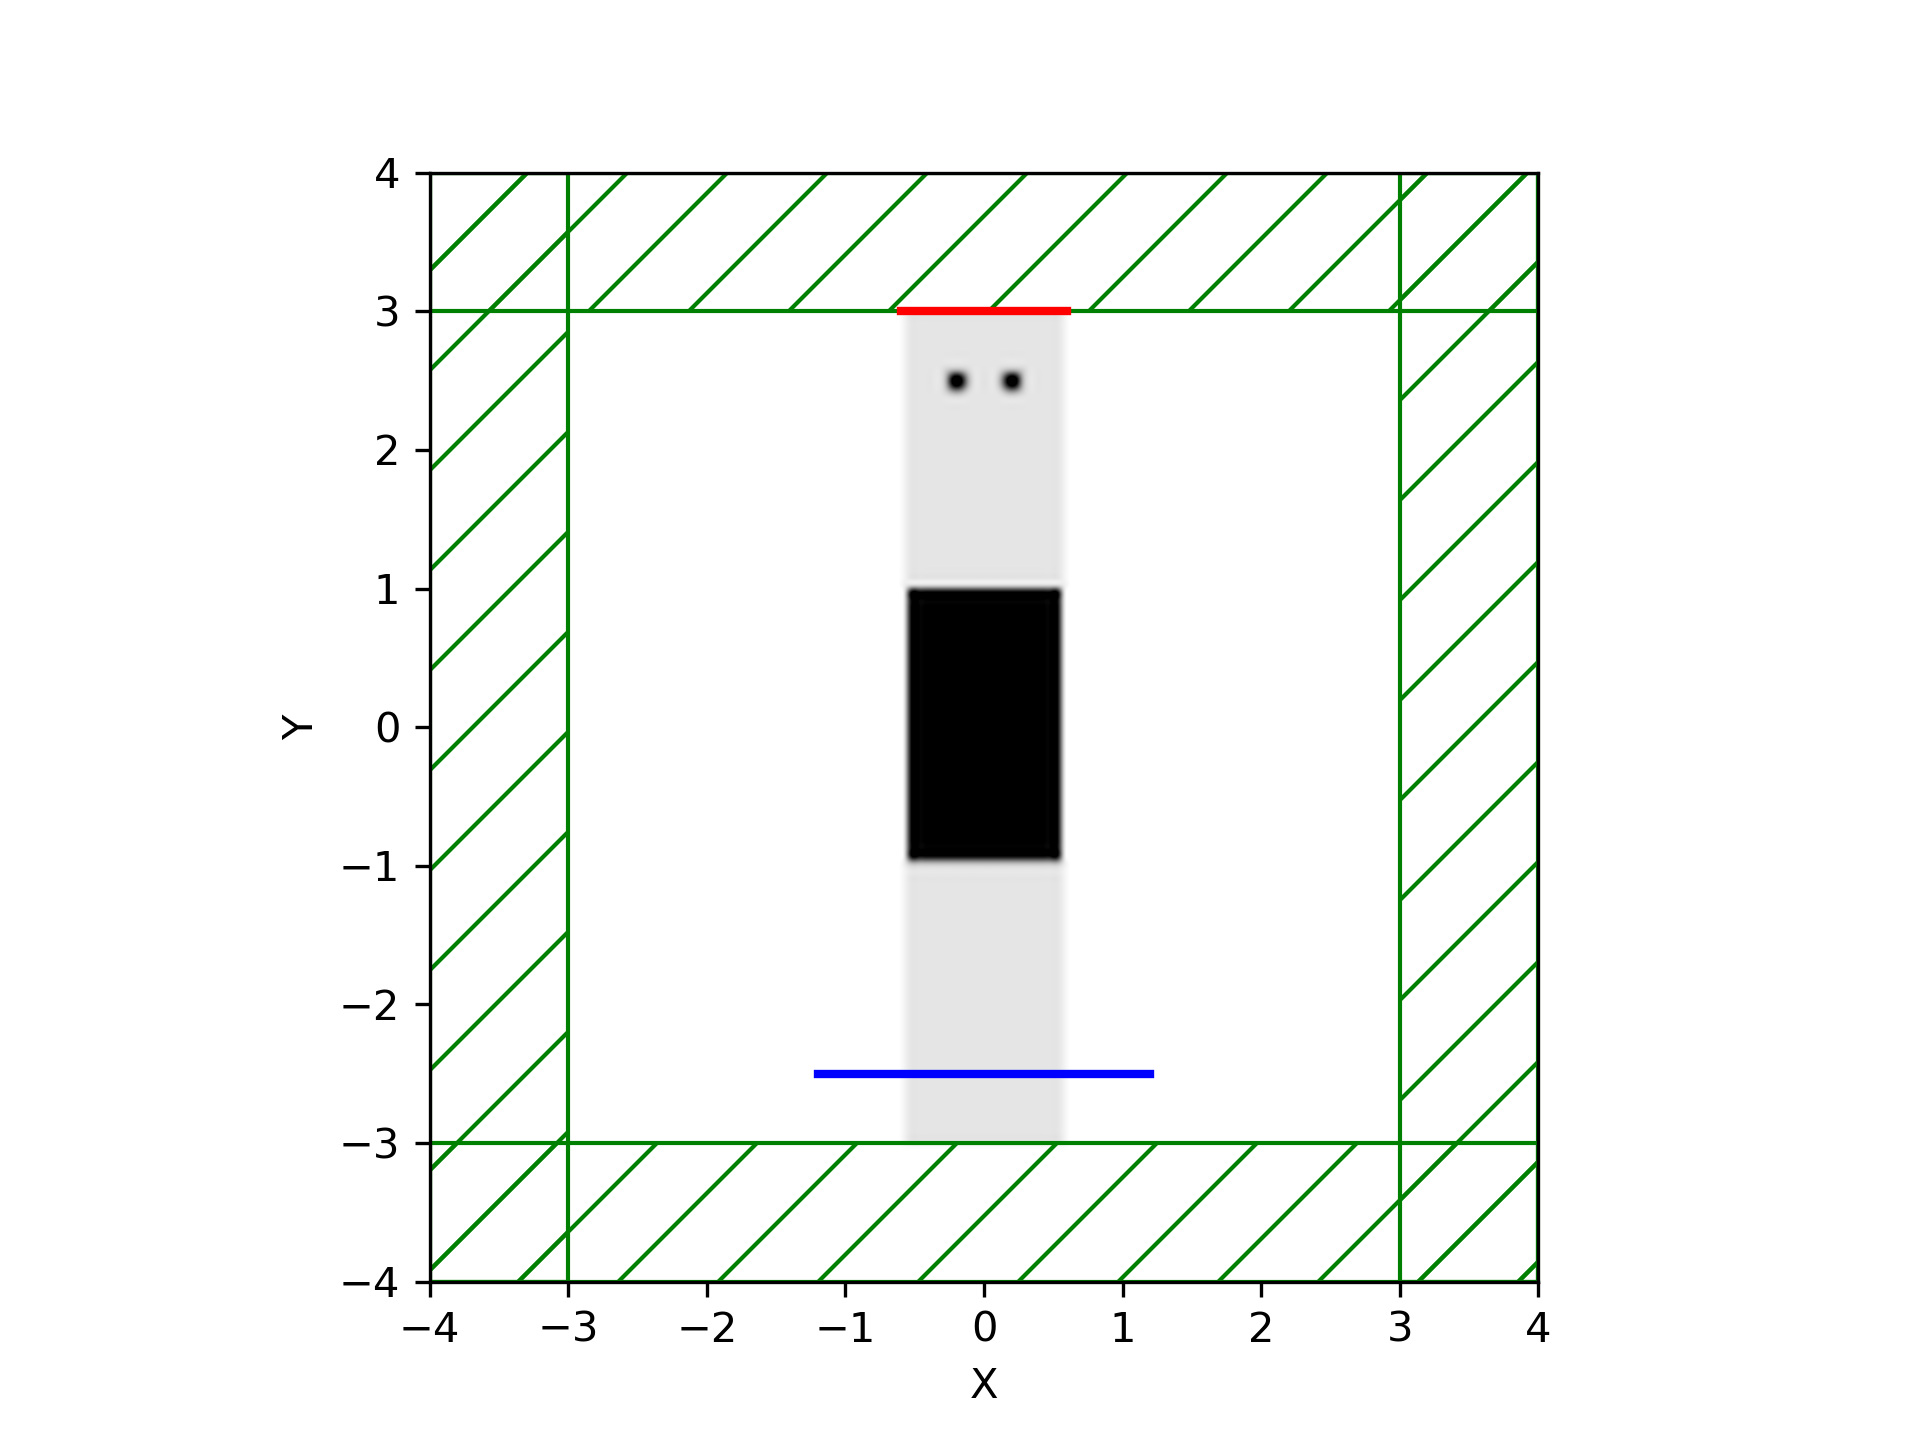

-----------
Initializing structure...
time for choose_chunkdivision = 0.000169039 s
Working in 2D dimensions.
Computational cell is 8 x 8 x 0 with resolution 20
     block, center = (0,2,0)
          size (1.2,2,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1.2,2,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,-2,0)
          size (1.2,2,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (-0.2,2.5,0)
          radius 0.1, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0.2,2.5,0)
          radius 0.1, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
time for set_epsilon = 0.0686791 s
lorentzian susceptibility: frequency=0.000905797, gamma=0


In [7]:
f = plt.figure(dpi=150)
sim.plot2D(ax=f.gca())
plt.show()

In [8]:
f = plt.figure(dpi=150)
animate = mp.Animate2D(sim,f=f,fields=mp.Hz,realtime=False,normalize=True)

pt = -0.5*sy+dpml+0.5
sim.run(mp.during_sources(mp.at_every(0.4, animate)),
            until_after_sources=mp.stop_when_fields_decayed(50, mp.Ex, mp.Vector3(0, pt,0), 1e-3))
plt.close()

<IPython.core.display.Javascript object>

/opt/anaconda3/envs/mp/lib/python3.6/site-packages/meep/simulation.py:1260: RuntimeWarning: Note: your sources include frequencies outside the range of validity of the material models. This is fine as long as you eventually only look at outputs (fluxes, resonant modes, etc.) at valid frequencies.
  warnings.warn(warn_src, RuntimeWarning)
/opt/anaconda3/envs/mp/lib/python3.6/site-packages/meep/simulation.py:1264: RuntimeWarning: DFT frequency 0.15 is out of material's range of 0.5649717514124294-0.7352941176470588
  warnings.warn(warn_dft_fmt.format(dftf, min_freq, max_freq), RuntimeWarning)
/opt/anaconda3/envs/mp/lib/python3.6/site-packages/meep/simulation.py:1264: RuntimeWarning: DFT frequency 0.35 is out of material's range of 0.5649717514124294-0.7352941176470588
  warnings.warn(warn_dft_fmt.format(dftf, min_freq, max_freq), RuntimeWarning)


RuntimeError: meep: simulation fields are NaN or Inf

In [99]:
filename = 'media/hole-wvg-cavity.mp4'
animate.to_mp4(10,filename)
Video(filename)

Generating MP4...


In [21]:
def sim_cavity(N=2,sy=6):
    sx = 2*(pad+dpml+N)+d  # size of cell in x direction
    cell = mp.Vector3(sx,sy,0)
    geometry = [mp.Block(center=mp.Vector3(0,2,0), size=mp.Vector3(w,2,0), material=SiO2),
                mp.Block(center=mp.Vector3(0,0,0), size=mp.Vector3(w,2,0), material=Si),
                mp.Block(center=mp.Vector3(0,-2,0), size=mp.Vector3(w,2,0), material=SiO2)]

for i in range(N):
        geometry.append(mp.Cylinder(material=Si, 
                                    center=mp.Vector3(-0.6+((i+1)*w)/(N+1),2.5,0),
                                    radius = r))
    
    src = [mp.Source(mp.GaussianSource(fcen, fwidth=df),
                 component=mp.Ex,
                 center=mp.Vector3(0,0.5*sy-dpml,0),
                 size=mp.Vector3(w,0,0))]
    
    sim = mp.Simulation(cell_size=cell,
                    geometry=geometry,
                    boundary_layers=pml_layers,
                    sources=src,
                    resolution=resolution)
    
    freg = mp.FluxRegion(center=mp.Vector3(0,-0.5*sy+dpml+0.5,0),
                     size=mp.Vector3(2*w,0,0))
    nfreq = 500
    trans = sim.add_flux(fcen, df, nfreq, freg)
    
    sim.run(until_after_sources=mp.stop_when_fields_decayed(50, mp.Ex, mp.Vector3(0,-0.5*sy+dpml+0.5,0), 1e-3))
    
    freqs = mp.get_flux_freqs(trans)
    psd = mp.get_fluxes(trans)

    return freqs, psd

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 13)

In [95]:
freqs_wg, psd_wg = sim_cavity(N=0) # simple waveguide
freqs_cav, psd_cav = sim_cavity() # cavity

-----------
Initializing structure...
time for choose_chunkdivision = 0.00086689 s
Working in 2D dimensions.
Computational cell is 7.4 x 6 x 0 with resolution 100
     block, center = (-2,0,0)
          size (4,1.2,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (2,0,0)
          size (4,1.2,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
time for set_epsilon = 0.532824 s
lorentzian susceptibility: frequency=0.000905797, gamma=0
lorentzian susceptibility: frequency=0.88125, gamma=0
lorentzian susceptibility: frequency=3.31657, gamma=0
-----------
on time step 374 (time=1.87), 0.0106976 s/step
on time step 869 (time=4.345), 0.00808407 s/step
on time step 1387 (time=6.935), 0.00773623 s/step
on time step 1898 (time=9.49), 0.00783176 s/step
on time step 2429 (time=12.145), 0.00754248 s/step
on time step 2960 (time=14.8), 0.00754026 s/step
on time step 3494

on time step 20071 (time=100.355), 0.0153602 s/step
on time step 20337 (time=101.685), 0.0150461 s/step
on time step 20603 (time=103.015), 0.015092 s/step
on time step 20854 (time=104.27), 0.0159397 s/step
on time step 21082 (time=105.41), 0.017547 s/step
on time step 21322 (time=106.61), 0.0166861 s/step
on time step 21574 (time=107.87), 0.0159 s/step
on time step 21834 (time=109.17), 0.0154303 s/step
on time step 22097 (time=110.485), 0.0152617 s/step
on time step 22362 (time=111.81), 0.015138 s/step
on time step 22630 (time=113.15), 0.01495 s/step
on time step 22894 (time=114.47), 0.0151557 s/step
on time step 23159 (time=115.795), 0.0151087 s/step
on time step 23425 (time=117.125), 0.0150826 s/step
on time step 23691 (time=118.455), 0.0150795 s/step
on time step 23955 (time=119.775), 0.0151537 s/step
on time step 24222 (time=121.11), 0.0150217 s/step
on time step 24487 (time=122.435), 0.0151339 s/step
on time step 24754 (time=123.77), 0.0150386 s/step
on time step 25018 (time=125.0

<IPython.core.display.Javascript object>


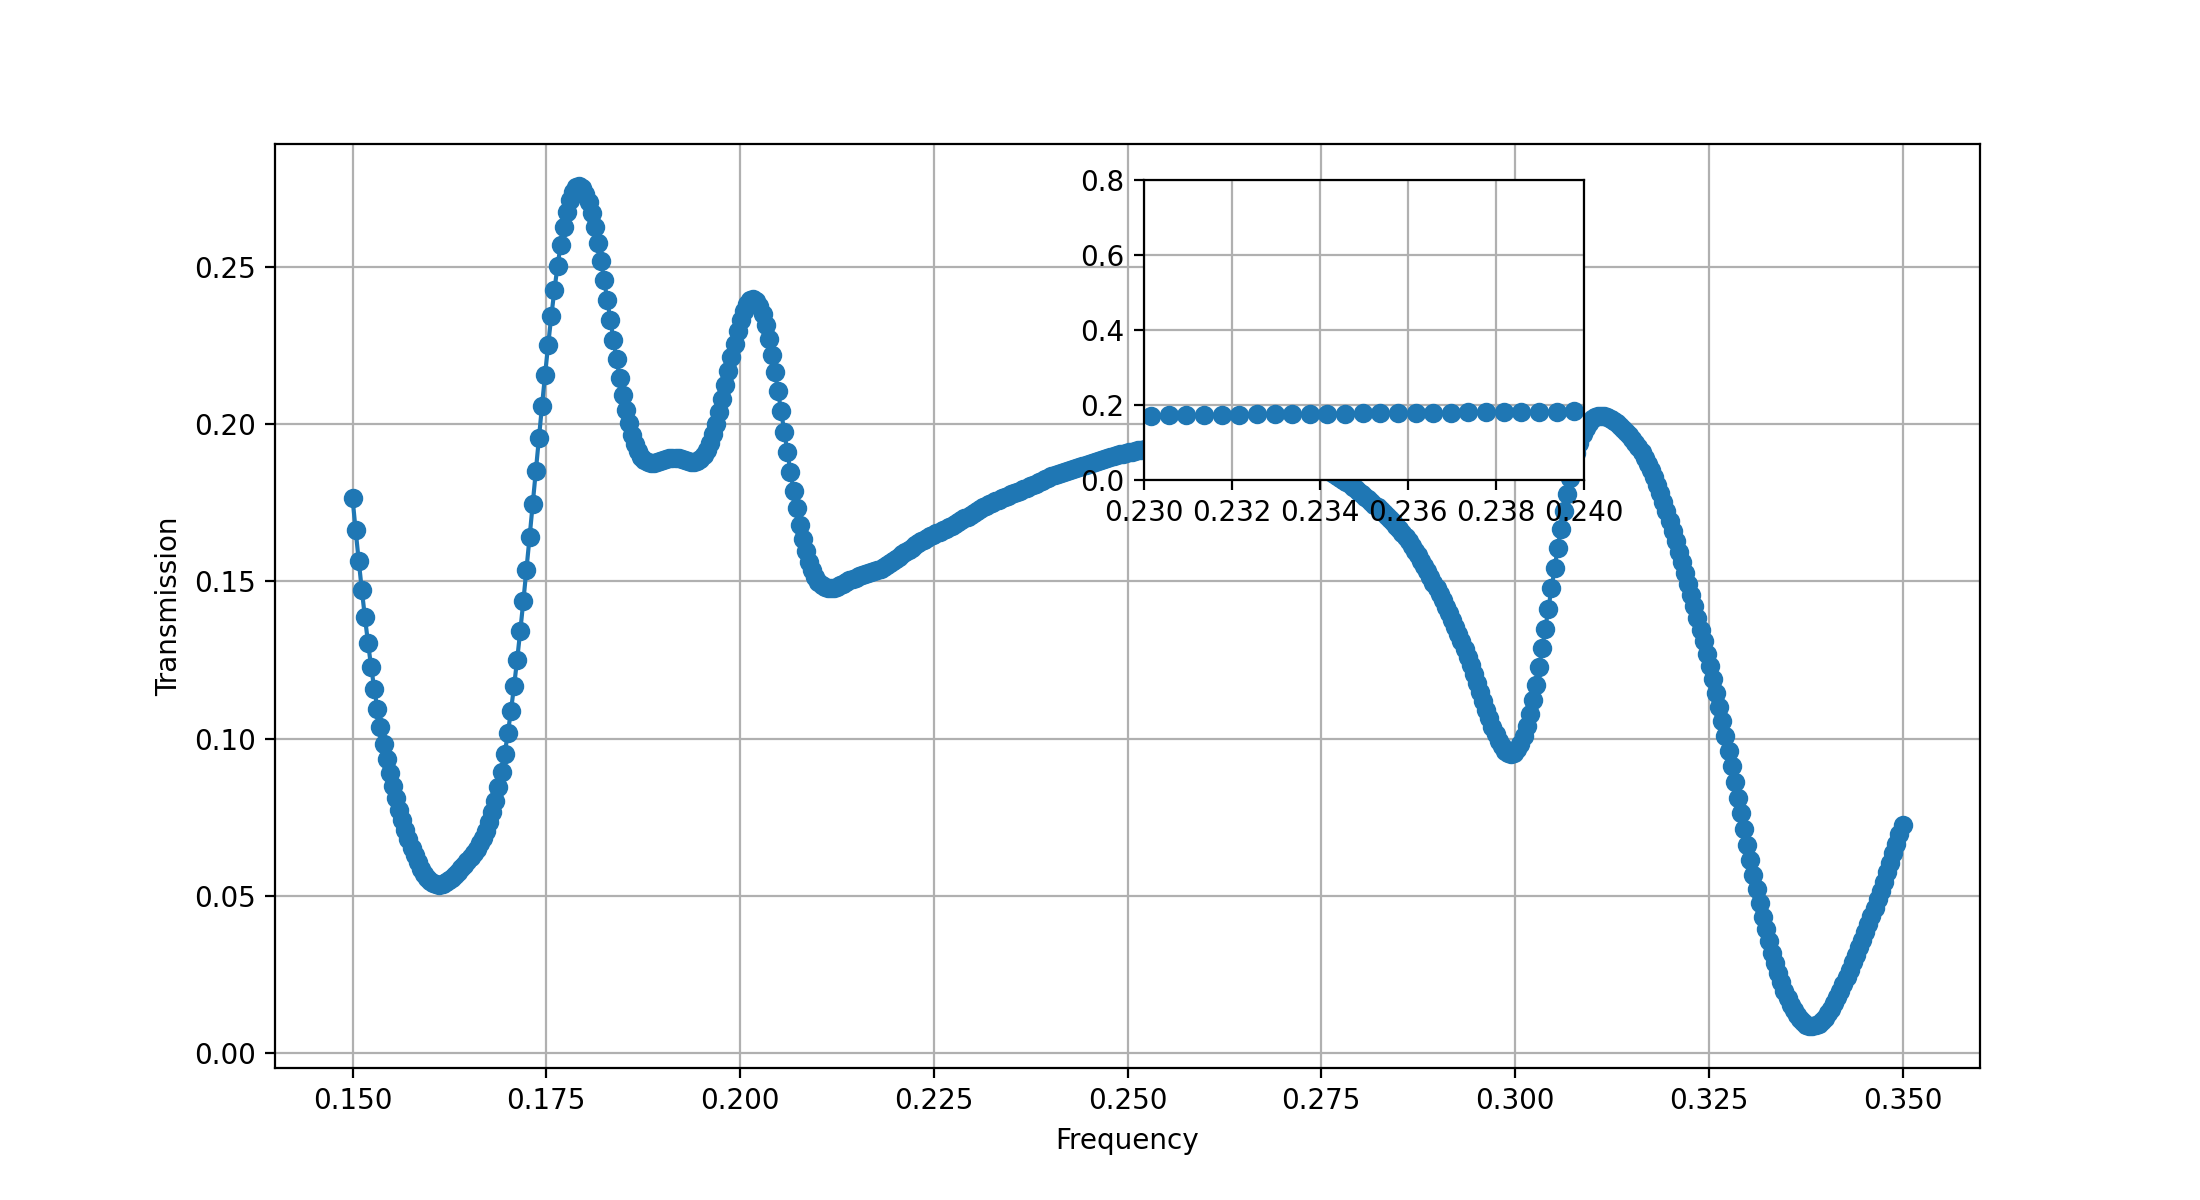

In [96]:
fig = plt.figure(figsize=(11,6),dpi=100)
ax = fig.add_subplot(111)
plt.plot(freqs_cav,np.array(psd_cav)/np.array(psd_wg),'o-')
plt.grid(True)
plt.xlabel('Frequency')
plt.ylabel('Transmission')

ax2 = fig.add_axes([0.52, 0.6, 0.2, 0.25])
plt.plot(freqs_cav,np.array(psd_cav)/np.array(psd_wg),'o-')
plt.xlim(0.23,0.24)
plt.ylim(0,0.8)
plt.grid(True)